In [ ]:
!unzip '/content/drive/MyDrive/Plant Disease Detection System/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

## **Working with the Dataset**

In [ ]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#importing keras (for building our image data generator)

import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

#loading a pretrained cnn model (preprocessing function)
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [ ]:
#loading image to our image_data_generator
#for both training and validation set

train_datagen= ImageDataGenerator(zoom_range=0.5,shear_range=0.3, horizontal_flip=True, preprocessing_function=preprocess_input)
val_datagen= ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
#loading images/specifying or passing the path

train=train_datagen.flow_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train", target_size=(256,256), batch_size=32)
val=val_datagen.flow_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid", target_size=(256,256), batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
#checking the preprocessed images...
t_img, label = train.next()

In [ ]:
def plotImage(img_arr, label):
  for im,l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.show()

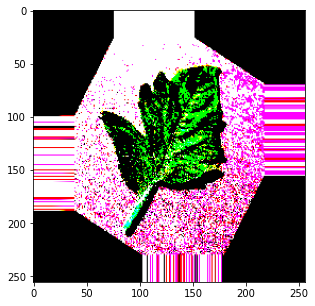

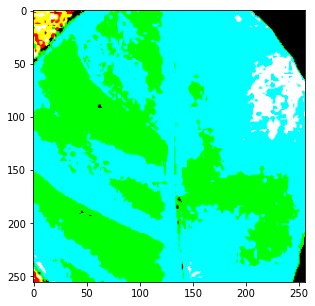

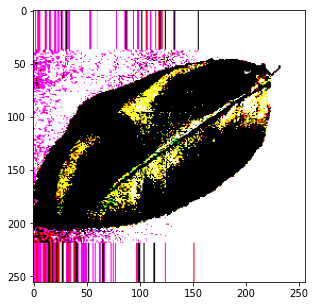

In [ ]:
plotImage(t_img[:3], label[:3])

## **Building Data Model**

In [ ]:
#importing keras specifics (including functional api)

from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
#creating base model
base_model=VGG19(input_shape=(256,256,3), include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
#transferring the learning (to prevent retraing our model)
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
#adding flatten and dense layers

X=Flatten()(base_model.output)
X=Dense(units=38,activation='softmax')(X)

#Creating final model
model=Model(base_model.input, X)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
#Compiling the model

model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

### **Early Stopping and Model Check Point**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping
es=EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1)

#model checkpoint
mc=ModelCheckpoint(filepath="Disease.h5",monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1, save_best_only=True)

cb=[es,mc]

# **Model Training**

In [ ]:
his=model.fit_generator(train, steps_per_epoch=16, epochs=50, verbose=1, callbacks=cb, validation_data=val, validation_steps=16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 24.4100 - accuracy: 0.1777 
Epoch 1: val_accuracy improved from -inf to 0.39453, saving model to best_model.h5
16/16 [==============================] - 669s 43s/step - loss: 24.4100 - accuracy: 0.1777 - val_loss: 15.6142 - val_accuracy: 0.3945
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 14.8442 - accuracy: 0.4355 
Epoch 2: val_accuracy improved from 0.39453 to 0.57227, saving model to best_model.h5
16/16 [==============================] - 637s 41s/step - loss: 14.8442 - accuracy: 0.4355 - val_loss: 11.1373 - val_accuracy: 0.5723
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 11.3070 - accuracy: 0.5312 
Epoch 3: val_accuracy did not improve from 0.57227
16/16 [==============================] - 711s 46s/step - loss: 11.3070 - accuracy: 0.5312 - val_loss: 11.1428 - val_accuracy: 0.5703
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 11.9065 - accuracy: 0.584

### **Plotting our Model**

In [ ]:
h=his.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

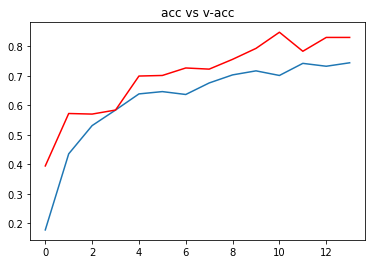

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')
plt.title('acc vs v-acc')
plt.show()

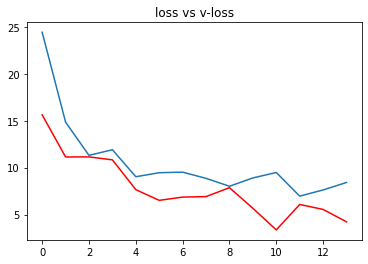

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')
plt.title('loss vs v-loss')
plt.show()

# **Model Testing**

In [ ]:
#loading the trained model

from keras.models import load_model
model=load_model("/content/drive/MyDrive/Plant Disease Detection System/Disease.h5")

In [ ]:
#Checking Accuracy of Trained Model
#(Evaluating our model)

acc=model.evaluate_generator(val)[1]
print(f"Model Accuracy: {acc*100}%")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


Model Accuracy: 78.76735925674438%


In [ ]:
#Creating a dictionary of the data list
ref= dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

In [ ]:
def prediction(path):
  img=load_img(path, target_size=(256,256))
  i=img_to_array(img)
  im=preprocess_input(i)
  img=np.expand_dims(im, axis=0)

  pred=np.argmax(model.predict(img))
  print(f"Disease: {ref[pred]}")

In [ ]:
path="/content/test/test/TomatoEarlyBlight2.JPG"
prediction(path)

Disease: Tomato___Late_blight
